In [16]:
import torch
from torch import nn
import torch.nn.functional as F
from torch import optim
import torchvision
import matplotlib.pyplot as plt
from tqdm import trange, tqdm

The aim of this notebook is to lay out a very simple neural network solution for predicting mnist handwritten digits so that I can attempt to recreate it using only numpy

### Load data

In [59]:
train_batch_size = 64
test_batch_size = 1000

In [60]:
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('./datasets', train=True, download=True,
                              transform=torchvision.transforms.Compose([
                                  torchvision.transforms.ToTensor(),
                                  torchvision.transforms.Normalize(0, 1)
                              ])),
    batch_size=train_batch_size, shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('./datasets', train=False, download=True,
                              transform=torchvision.transforms.Compose([
                                  torchvision.transforms.ToTensor(),
                                  torchvision.transforms.Normalize(0, 1)
                              ])),
    batch_size=test_batch_size, shuffle=True
)

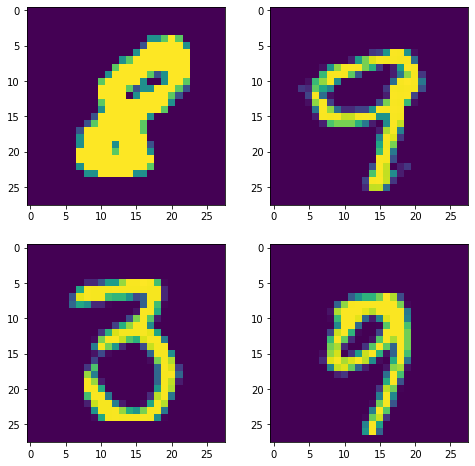

In [61]:
# visualize some images
train_iter = iter(train_loader)
images, labels = train_iter.next()
plt.figure(figsize=(8,8))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    ax.imshow(images[i].reshape(28, 28))

In [62]:
images.size(), labels.size()

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

### Train simple fully connected neural network

*The idea here is to keep it simple so I can recreate it using only numpy*

In [70]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(784, 200)
        self.fc2 = nn.Linear(200, 10)
    
    
    def forward(self, x):
        x = x.view(x.size()[0], 784)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [71]:
model = Model()
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [72]:
losses = []
accuracies = []
for epoch in range(5):
    total_loss = 0
    total_accuracy = 0
    for i, data in tqdm(enumerate(train_loader)):
        optimizer.zero_grad()
        images, labels = data
        output = model(images)
        loss = loss_function(output, labels)
        total_loss += loss
        loss.backward()
        optimizer.step()
        losses.append(loss)
        accuracy = (output.max(1)[1] == labels).sum().item() / labels.size()[0]
        total_accuracy += accuracy
        accuracies.append(accuracy)
    print(f'Epoch {epoch+1}, Loss: {total_loss/(i+1)}, Accuracy: {total_accuracy/(i+1)}')

938it [00:11, 80.75it/s]
8it [00:00, 72.61it/s]

Epoch 1, Loss: 1.2204774618148804, Accuracy: 0.7547641257995735


938it [00:11, 80.43it/s]
8it [00:00, 71.40it/s]

Epoch 2, Loss: 0.48642370104789734, Accuracy: 0.8774486940298507


938it [00:11, 80.23it/s]
8it [00:00, 73.56it/s]

Epoch 3, Loss: 0.38913315534591675, Accuracy: 0.8937899786780383


938it [00:12, 75.80it/s]
8it [00:00, 75.17it/s]

Epoch 4, Loss: 0.3489631116390228, Accuracy: 0.9030517057569296


938it [00:11, 80.77it/s]

Epoch 5, Loss: 0.3242661952972412, Accuracy: 0.9092317430703625


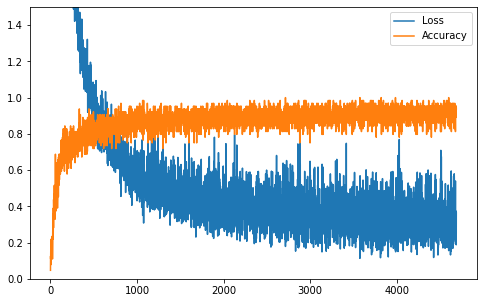

In [80]:
plt.figure(figsize=(8,5))
plt.ylim([0, 1.5])
plt.plot(losses)
plt.plot(accuracies)
plt.legend(['Loss', 'Accuracy'])

In [79]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, pred = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
print(f'Accuracy on test set: {correct / total}')

Accuracy on test set: 0.9137
